# About
This is an assignment I did as an assignment on Coursera on Data visualizations 
It covers two datasets:
1. Data Science Survey results which is contains results for a survey on different interests of people in different aspects of data science. It is obtained from this link :https://cocl.us/datascience_survey_data. I plotted two bar charts both showing the percentage of interest in three categories of seven different aspects of data science based on the number of respondents. The difference in the bar charts is that one has borders and the other does not
2. SF Neighborhood Crime Data which contains data on different crimes committed on different neighbourhoods in SF on different days of the week. I plotted a map using Folium to show the distribution of total reported crimes per neighbourhood

### Import necessary libraries for data wrangling, analysis and visualizations

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Data Science Survey Results
Load the survey results

In [2]:
#load the survey results and set first column as index
df_dsurvey = pd.read_csv('https://cocl.us/datascience_survey_data', index_col =0)

In [3]:
df_dsurvey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


#### Bar chart of Percentage of interest
Format the data for data analysis

In [4]:
#sort dataframe in descending order of 'Very Interested column'
df_dsurvey = df_dsurvey.sort_values(by = 'Very interested')
df_dsurvey

,Very interested,Somewhat interested,Not interested
Data Journalism,429,1081,610
Deep Learning,1263,770,136
Big Data (Spark / Hadoop),1332,729,127
Data Visualization,1340,734,102
Machine Learning,1629,477,74
Data Analysis / Statistics,1688,444,60


In [5]:
#create copy of original dataframe
df_dsurvey1 = df_dsurvey.copy()
df_dsurvey1

,Very interested,Somewhat interested,Not interested
Data Journalism,429,1081,610
Deep Learning,1263,770,136
Big Data (Spark / Hadoop),1332,729,127
Data Visualization,1340,734,102
Machine Learning,1629,477,74
Data Analysis / Statistics,1688,444,60


In [6]:
#convert to percentages of total numbers to 2 decimal places. Know that total number of respondents is 2233
for col in df_dsurvey1:
    df_dsurvey1[col] = round((df_dsurvey1[col]/2233 *100), 2)
df_dsurvey1

,Very interested,Somewhat interested,Not interested
Data Journalism,19.21,48.41,27.32
Deep Learning,56.56,34.48,6.09
Big Data (Spark / Hadoop),59.65,32.65,5.69
Data Visualization,60.01,32.87,4.57
Machine Learning,72.95,21.36,3.31
Data Analysis / Statistics,75.59,19.88,2.69



Plot the graph

Text(0.5, 1.0, 'Percentage of interest')

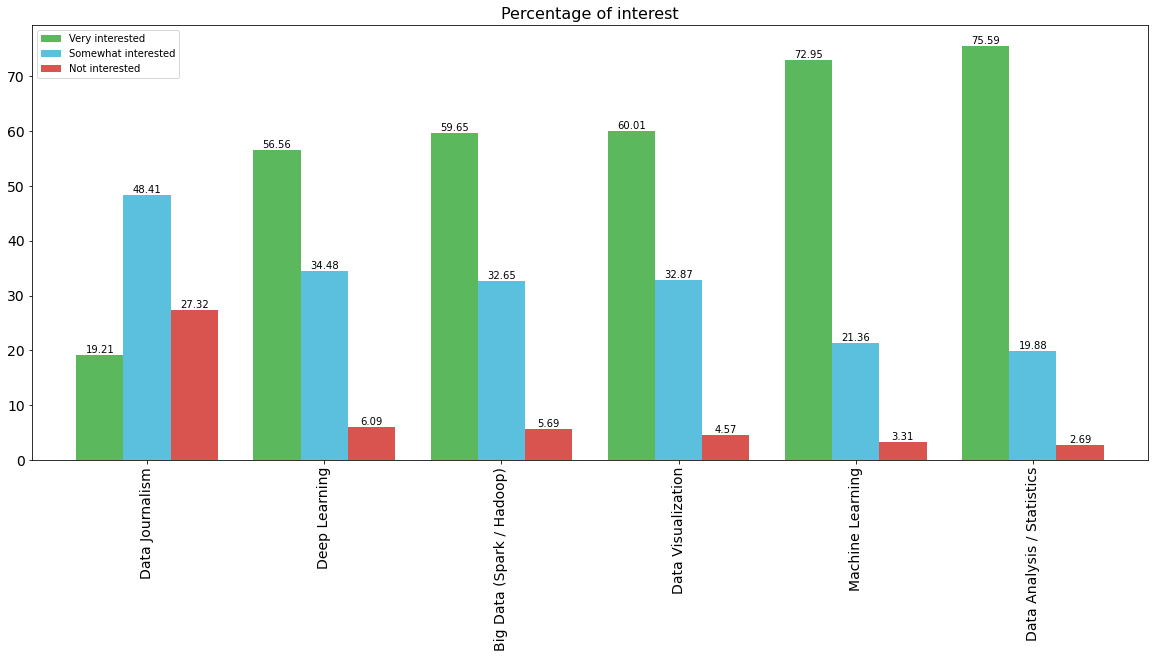

In [7]:
#plot the bar chart
ax = df_dsurvey1.plot(kind = 'bar', 
                     figsize = (20,8), 
                     width = 0.8,
                     color = ('#5cb85c', '#5bc0de', '#d9534f'),
                     fontsize = 14
                     )

#annotate the bars with the percentages with axes patches    
for perc in ax.patches:                 
    ax.annotate(round(perc.get_height(),2), 
                (perc.get_x()+perc.get_width()/2., perc.get_height()),
                ha='center', 
                va='center',
                xytext=(0, 5),
                textcoords='offset points')
    
#set the title of the chart
ax.set_title('Percentage of interest', fontsize =16)

Text(0.5, 1.0, 'Percentage of interest')

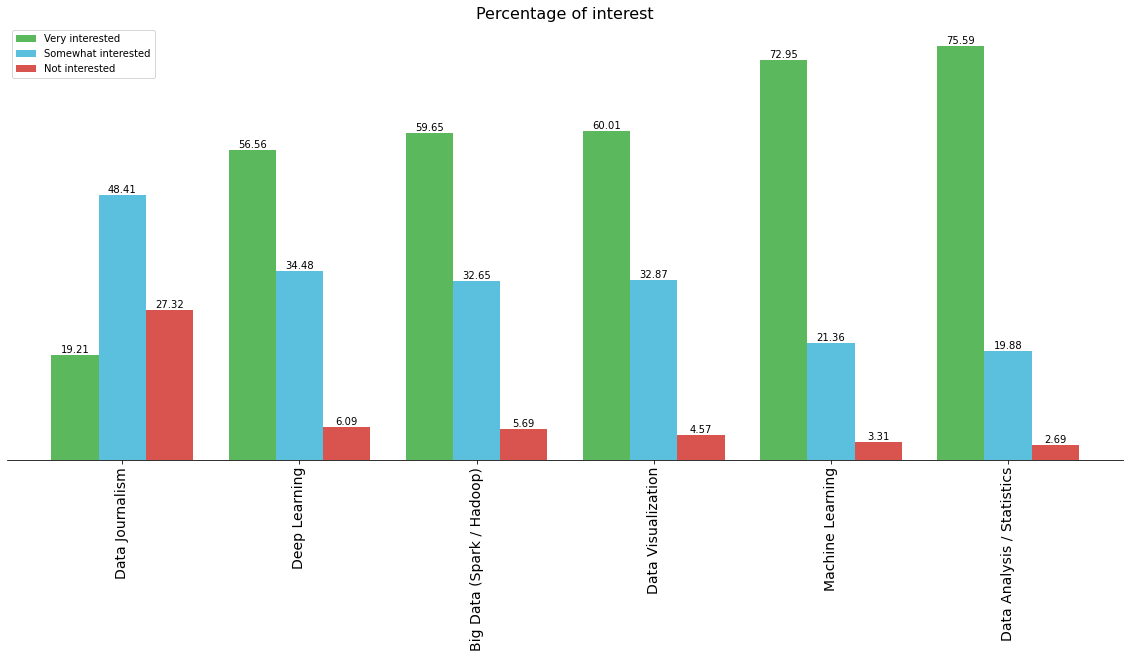

In [8]:
#plot the bar chart
ax1 = df_dsurvey1.plot(kind = 'bar', 
                       figsize = (20,8), 
                       width = 0.8,
                       color = ('#5cb85c', '#5bc0de', '#d9534f'),
                       fontsize = 14,
                      )
                     
#remove the top, left and right borders
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)

#remove y ticks
ax1.axes.yaxis.set_ticks([])

#annotate the bars with the percentages with axes patches    
for perc in ax.patches:                 
    ax1.annotate(round(perc.get_height(),2), 
                (perc.get_x()+perc.get_width()/2., perc.get_height()),
                ha='center', 
                va='center',
                xytext=(0, 5),
                textcoords='offset points')
    
#set the title of the chart
ax1.set_title('Percentage of interest', fontsize =16)

### SF Crime Data: Choropleth
Load the data set

In [9]:
df_sfcrime = pd.read_csv('https://cocl.us/sanfran_crime_dataset')


In [10]:
df_sfcrime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [11]:
#create new dataframe by grouping the dataset by the district column and counting the number of elements within the groups
df_neighbourhood = df_sfcrime.groupby(['PdDistrict']).count()

#extract one column (as all columns have the same totals) and add it to a new dataframe. The district is currently the index
df_neighbourhood1 = df_neighbourhood[['IncidntNum']]

In [12]:
#reset the index so that we have the district column as it's own column and not index label
df_neighbourhood1 = df_neighbourhood1.reset_index()

In [13]:
#rename the column names to something that makes more sense
df_neighbourhood1 = df_neighbourhood1.rename(columns = {'PdDistrict': 'Neighbourhood', 'IncidntNum': 'Count'})
df_neighbourhood1

,Neighbourhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


### SF Crime on a Map

In [14]:
#install folium for geomap plotting
!pip install folium
import folium

     |████████████████████████████████| 95 kB 2.8 MB/s eta 0:00:011


In [15]:
import folium

In [16]:
#read the geojson file for the neighborhoods
sanfran = r'https://cocl.us/sanfran_geojson' # geojson file

# create a plain sf map
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12, tiles='OpenStreetMap')

In [17]:
folium.Choropleth(geo_data=sanfran, 
                  data = df_neighbourhood1,
                  columns = ['Neighbourhood', 'Count'],
                  key_on = 'feature.properties.DISTRICT',
                  fill_color='YlOrRd',
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name='Crime Rate in San Francisco'
                 ).add_to(sf_map)

#sf_map

The map could not be rendered in markdown. Check the Jupyter notebook to see the output